#


##
- In this kernel I will perform segmentation of German bank customers.
- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
german= pd.read_csv('/content/german_credit_data_task2.csv')
german.head(20)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [173]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [174]:
german.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [175]:
german.duplicated().sum()

0

In [176]:
german.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [177]:
german.drop('Unnamed: 0',axis=1,inplace=True)


In [178]:
german.drop('Age',axis=1,inplace=True)

In [179]:
german['Saving accounts'].fillna(german['Saving accounts'].mode()[0], inplace=True)
german['Checking account'].fillna(german['Checking account'].mode()[0], inplace=True)

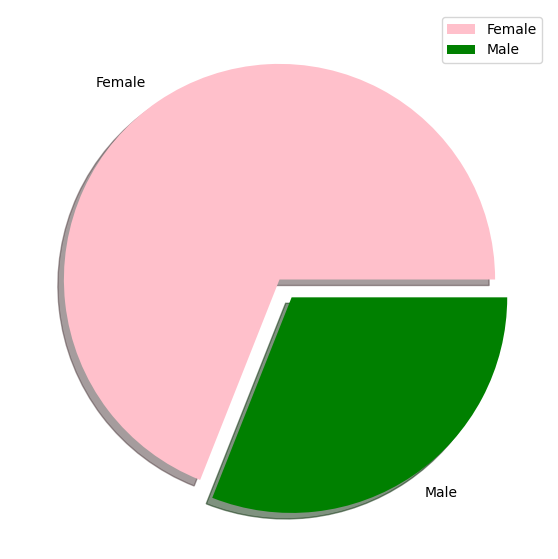

In [180]:
plt.figure(figsize=(7,7))
size=german['Sex'].value_counts()
label=['Female','Male']
color=['Pink','green']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

In [181]:
size

,count
Sex,
male,690
female,310


In [182]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
german['Sex'] = le.fit_transform(german['Sex'])
german['Housing'] = le.fit_transform(german['Housing'])
german['Saving accounts'] = le.fit_transform(german['Saving accounts'])
german['Checking account'] = le.fit_transform(german['Checking account'])
german['Purpose'] = le.fit_transform(german['Purpose'])

In [183]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sex               1000 non-null   int64
 1   Job               1000 non-null   int64
 2   Housing           1000 non-null   int64
 3   Saving accounts   1000 non-null   int64
 4   Checking account  1000 non-null   int64
 5   Credit amount     1000 non-null   int64
 6   Duration          1000 non-null   int64
 7   Purpose           1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [184]:
x=german.iloc[:,[5,6]]

In [185]:
print(type(x))
print((x[:5]))

<class 'pandas.core.frame.DataFrame'>
   Credit amount  Duration
0           1169         6
1           5951        48
2           2096        12
3           7882        42
4           4870        24


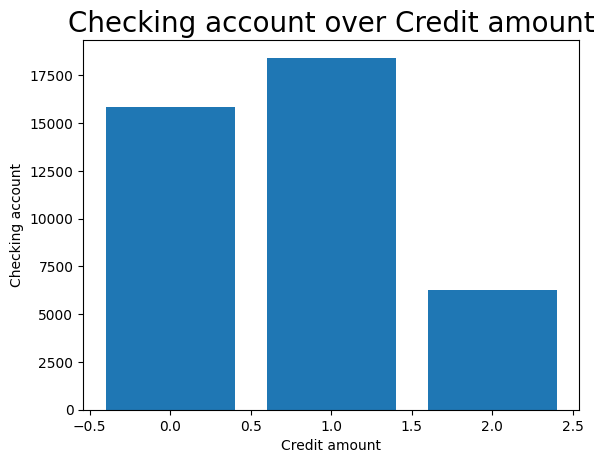

In [186]:
plt.bar(german['Checking account'],german['Credit amount'])
plt.title('Checking account over Credit amount',fontsize=20)
plt.xlabel('Credit amount')
plt.ylabel('Checking account')
plt.show()

In [187]:
x=x.values

In [188]:
print(type(x))
print(x[:5])

<class 'numpy.ndarray'>
[[1169    6]
 [5951   48]
 [2096   12]
 [7882   42]
 [4870   24]]


In [189]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=8,min_samples=6,metric='euclidean')

In [190]:
model=db.fit(x)

In [191]:
label=model.labels_

In [192]:
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  1,  2, -1,
       -1, -1, -1, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3,
        4, -1, -1, -1,  5, -1, -1,  6, -1, -1, -1,  7, -1, 12, -1, -1, -1,
       -1,  3, -1, -1, -1, -1, -1, -1, -1,  7,  8, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  6, -1, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  0, -1, -1, -1, -1,  1,  9, -1, -1, -1, -1, -1, -1, -1,  4, -1,
       14, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, 16, -1,
       -1, -1, -1, -1, -1, 10, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1,  5,
       -1, 18, -1, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, 12, 10, -1,
       -1, -1,  0,  0, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, 13,
       -1, 18, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, 17,  7, -1, -1, -1, 14, -1, -1, -1,
       17, -1, 13,  1, -1,  1, -1, -1, -1, -1, -1, 14, -1, -1, -1, -1, -1,
       15, 11, -1, -1, -1

In [193]:
from sklearn import metrics

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 19


In [194]:
y_means = db.fit_predict(x)
y_means

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  1,  2, -1,
       -1, -1, -1, 16, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3,
        4, -1, -1, -1,  5, -1, -1,  6, -1, -1, -1,  7, -1, 12, -1, -1, -1,
       -1,  3, -1, -1, -1, -1, -1, -1, -1,  7,  8, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  6, -1, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  0, -1, -1, -1, -1,  1,  9, -1, -1, -1, -1, -1, -1, -1,  4, -1,
       14, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, 16, -1,
       -1, -1, -1, -1, -1, 10, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1,  5,
       -1, 18, -1, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, 12, 10, -1,
       -1, -1,  0,  0, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, 13,
       -1, 18, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, 17,  7, -1, -1, -1, 14, -1, -1, -1,
       17, -1, 13,  1, -1,  1, -1, -1, -1, -1, -1, 14, -1, -1, -1, -1, -1,
       15, 11, -1, -1, -1

In [195]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [196]:
# Calculate Silhouette Score for Hierarchical Clustering
silhouette_score_hc = metrics.silhouette_score(x, y_hc)
print("Silhouette Score for Hierarchical Clustering: ", silhouette_score_hc)

Silhouette Score for Hierarchical Clustering:  0.6638311356034616


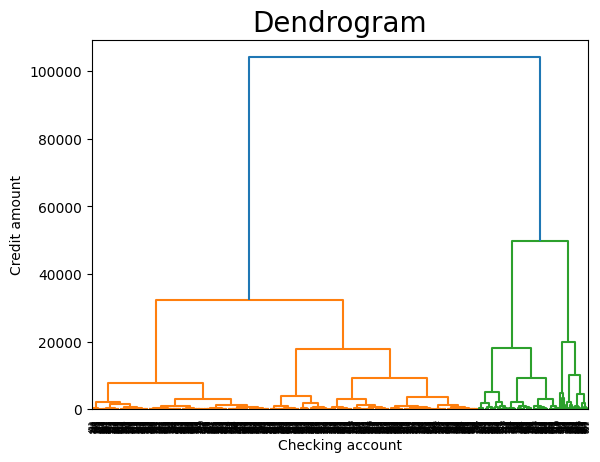

In [197]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Checking account')
plt.ylabel('Credit amount')
plt.show()

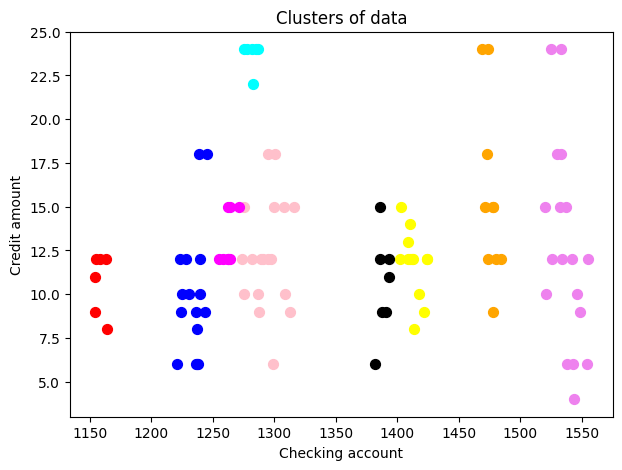

In [198]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Checking account')
plt.ylabel('Credit amount')
plt.title('Clusters of data')
plt.show()